# Introduction

I watch k-dramas religiously. But honestly I don't have much time for all the kdramas available in all of the channels out there. The objective of this project is to help me decide whether the kdrama is something that I would like to watch.

Data source: https://www.kaggle.com/datasets/ahbab911/top-250-korean-dramas-kdrama-dataset

I further edited the dataset to include 3 columns: male lead (I think I prefer male leads), 1st genre (My hypothesis is I watch comedy a lot) and preference (the target column,whether the kdrama is my taste or not).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gspread as gs
%matplotlib inline

In [ ]:
file='https://docs.google.com/spreadsheets/d/e/2PACX-1vQ3VyHmaYPGrRXa9_0INVF541916Oc9oixGHFitqz_SWFsyhcH5FHqA226MaKIhz2EJv3CaMjjrD_FR/pub?gid=669078690&single=true&output=csv'
df=pd.read_csv(file)
df.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,First Genre,Tags,Director,Screenwriter,Cast,Lead - Male,Production companies,Rank,Preference
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family",Life,"Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...",1,"Page One Film, Number Three Pictures",#1,1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama",Thriller,"Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",1,Monster Union,#2,1
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical",Friendship,"Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...",1,"Egg Is Coming, CJ ENM",#3,1
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical",Friendship,"Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...",1,"Egg Is Coming, CJ ENM",#4,1
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family",Psychological,"Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",1,Chorokbaem Media,#5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  250 non-null    object 
 1   Aired Date            250 non-null    object 
 2   Year of release       250 non-null    int64  
 3   Original Network      250 non-null    object 
 4   Aired On              250 non-null    object 
 5   Number of Episodes    250 non-null    int64  
 6   Duration              250 non-null    object 
 7   Content Rating        245 non-null    object 
 8   Rating                250 non-null    float64
 9   Synopsis              250 non-null    object 
 10  Genre                 250 non-null    object 
 11  First Genre           250 non-null    object 
 12  Tags                  250 non-null    object 
 13  Director              249 non-null    object 
 14  Screenwriter          249 non-null    object 
 15  Cast                  2

In [ ]:
df.describe()

,Year of release,Number of Episodes,Rating,Lead - Male,Preference
count,250.00000,250.000000,250.000000,250.000000,250.000000
mean,2018.25600,19.064000,8.534000,0.684000,0.224000
std,3.26452,13.245743,0.221359,0.465846,0.417758
min,2003.00000,1.000000,8.300000,0.000000,0.000000
25%,2017.00000,16.000000,8.300000,0.000000,0.000000
50%,2019.00000,16.000000,8.500000,1.000000,0.000000
75%,2021.00000,20.000000,8.700000,1.000000,0.000000
max,2022.00000,133.000000,9.200000,1.000000,1.000000


In [ ]:
df['Preference'].value_counts()

0    194
1     56
Name: Preference, dtype: int64

In [ ]:
df['Preference'].value_counts(normalize=True)

0    0.776
1    0.224
Name: Preference, dtype: float64

In [ ]:
df_like=df[df['Preference']==1]

<Axes: >

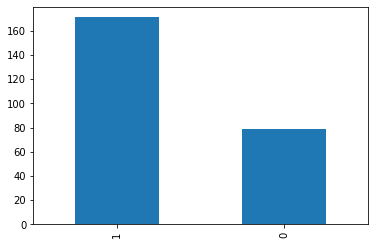

In [ ]:
df['Lead - Male'].value_counts().plot(kind='bar')

<Axes: >

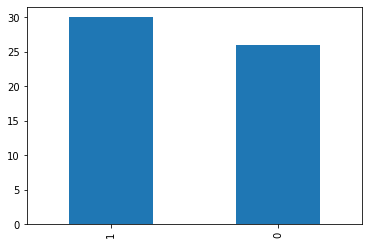

In [ ]:
df_like['Lead - Male'].value_counts().plot(kind='bar')

<Axes: >

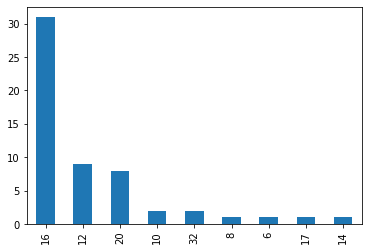

In [ ]:
df_like['Number of Episodes'].value_counts().plot(kind='bar')

<Axes: >

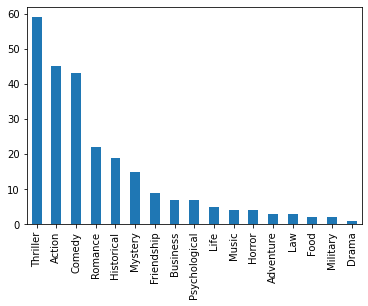

In [ ]:
df['First Genre'].value_counts().plot(kind='bar')

<Axes: >

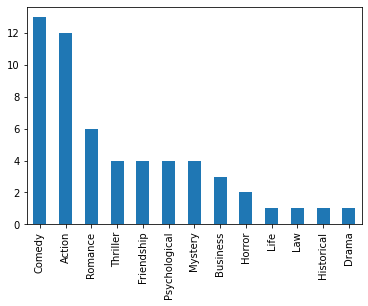

In [ ]:
df_like['First Genre'].value_counts().plot(kind='bar')

In [ ]:
#convert duration to minutes
df['Duration'] = df['Duration'].str.replace('[A-Za-z]\D+','',regex=True)
df['Duration'] = df['Duration'].str.replace(' ','',regex=True)
df['Duration'] = pd.to_numeric(df['Duration'])
df['Duration'].head()

0     52
1    110
2    130
3    140
4    117
Name: Duration, dtype: int64

<Axes: >

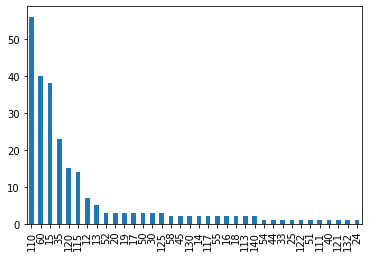

In [ ]:
df['Duration'].value_counts().plot(kind='bar')

<Axes: >

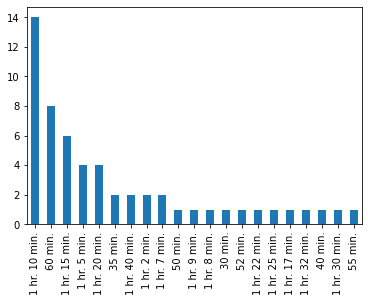

In [ ]:
df_like['Duration'].value_counts().plot(kind='bar')

In [ ]:
df['Original Network'].value_counts()

tvN                       49
SBS                       30
MBC                       26
KBS2                      25
OCN                       19
Netflix,  tvN             16
jTBC                      15
Netflix                   12
Netflix, tvN               8
jTBC, Netflix              4
Netflix, SBS               4
MBC, Netflix               3
Netflix,  SBS              2
jTBC,  Netflix             2
YouTube                    2
iQiyi, tvN                 2
jTBC, Viki                 2
Wavve                      2
Viki                       1
Naver TV Cast              1
iQiyi, KBS2, Viki          1
Channel A                  1
Hulu                       1
SBS, ViuTV                 1
MBN                        1
TV Chosun                  1
Daum Kakao TV              1
KBS2, Netflix              1
Apple TV+                  1
Disney+                    1
Daum Kakao TV, Netflix     1
MBC, ViuTV                 1
tvN, ViuTV                 1
KBS2, ViuTV                1
iQiyi, jTBC   

In [ ]:
df_like['Original Network'].value_counts()

tvN                15
Netflix,  tvN       6
SBS                 5
KBS2                4
Netflix, tvN        4
jTBC                4
jTBC, Netflix       3
MBC                 3
Netflix             3
Netflix, SBS        2
Netflix,  OCN       1
MBC, Netflix        1
ENA, Netflix        1
Netflix,  SBS       1
Wavve               1
jTBC,  Netflix      1
iQiyi, tvN          1
Name: Original Network, dtype: int64

<Axes: >

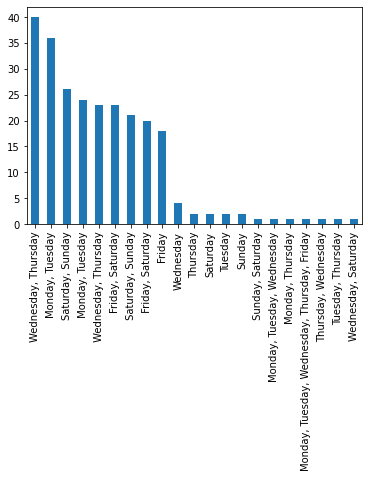

In [ ]:
df['Aired On'].value_counts().plot(kind='bar')

<Axes: >

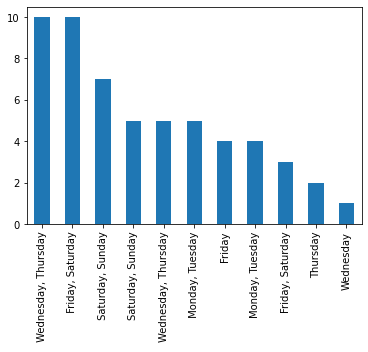

In [ ]:
df_like['Aired On'].value_counts().plot(kind='bar')

<Axes: >

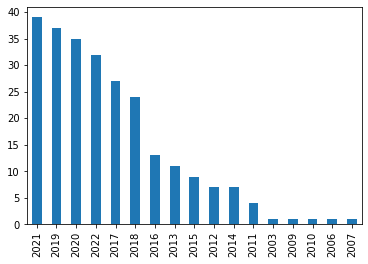

In [ ]:
df['Year of release'].value_counts().plot(kind='bar')

<Axes: >

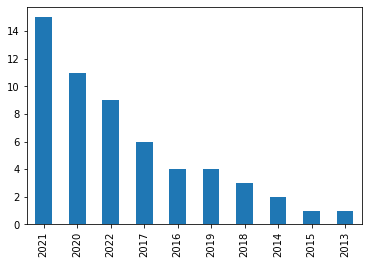

In [ ]:
df_like['Year of release'].value_counts().plot(kind='bar')

# Data Cleaning and Preparation

In [ ]:
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 249
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  242 non-null    object 
 1   Aired Date            242 non-null    object 
 2   Year of release       242 non-null    int64  
 3   Original Network      242 non-null    object 
 4   Aired On              242 non-null    object 
 5   Number of Episodes    242 non-null    int64  
 6   Duration              242 non-null    int64  
 7   Content Rating        242 non-null    object 
 8   Rating                242 non-null    float64
 9   Synopsis              242 non-null    object 
 10  Genre                 242 non-null    object 
 11  First Genre           242 non-null    object 
 12  Tags                  242 non-null    object 
 13  Director              242 non-null    object 
 14  Screenwriter          242 non-null    object 
 15  Cast                  2

In [ ]:
#removing whitespaces
df['Original Network']=df['Original Network'].str.strip()
df['Original Network']=df['Original Network'].str.replace('  ', ' ')
df['Original Network'].unique()

array(['Netflix', 'tvN', 'Netflix, tvN', 'Wavve', 'ENA, Netflix', 'jTBC',
       'MBC, Netflix', 'KBS2', 'MBC, Viki', 'Netflix, OCN', 'MBC', 'SBS',
       'OCN', 'Netflix, SBS', 'jTBC, Netflix', 'Hulu, MBC', 'iQiyi, tvN',
       'jTBC, Viki', 'ViuTV', 'Daum Kakao TV, Netflix', 'KBS2, Netflix',
       'OCN, tvN', 'ENA, Olleh TV', 'iQiyi, jTBC', 'KBS2, ViuTV',
       'tvN, ViuTV', 'MBC, ViuTV', 'Apple TV+', 'Disney+',
       'iQiyi, KBS2, Viki', 'Channel A', 'Hulu', 'Naver TV Cast', 'MBN',
       'SBS, ViuTV', 'Daum Kakao TV', 'Viki', 'TV Chosun',
       'Naver TV Cast, vLive'], dtype=object)

For this project I would be using only three features: duration, no. of episodes and orginal network. 

In [ ]:
#creating new dfs for target and features only
df_new=df[['Number of Episodes','Duration','Lead - Male','Original Network','First Genre','Preference']]

In [ ]:
cat=['Original Network','First Genre']

In [ ]:
df_final=pd.get_dummies(df_new,columns=cat,drop_first=True)

In [ ]:
df_final.columns

Index(['Number of Episodes', 'Duration', 'Lead - Male', 'Preference',
       'Original Network_Channel A', 'Original Network_Daum Kakao TV',
       'Original Network_Daum Kakao TV, Netflix', 'Original Network_Disney+',
       'Original Network_ENA, Netflix', 'Original Network_ENA, Olleh TV',
       'Original Network_Hulu', 'Original Network_Hulu, MBC',
       'Original Network_KBS2', 'Original Network_KBS2, Netflix',
       'Original Network_KBS2, ViuTV', 'Original Network_MBC',
       'Original Network_MBC, Netflix', 'Original Network_MBC, Viki',
       'Original Network_MBC, ViuTV', 'Original Network_MBN',
       'Original Network_Naver TV Cast',
       'Original Network_Naver TV Cast, vLive', 'Original Network_Netflix',
       'Original Network_Netflix, OCN', 'Original Network_Netflix, SBS',
       'Original Network_Netflix, tvN', 'Original Network_OCN',
       'Original Network_OCN, tvN', 'Original Network_SBS',
       'Original Network_SBS, ViuTV', 'Original Network_TV Chosun',
  

# Creating the Model

In [ ]:
from sklearn.model_selection import train_test_split,StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(df_final.drop('Preference',axis=1), 
                                                    df_final['Preference'], test_size=0.30, 
                                                    random_state=101)



In [ ]:
# import module
from sklearn.preprocessing import MinMaxScaler

# scale features
scale=MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
#Hyperparameter tuning
# define model/create instance
lr=LogisticRegression()

#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)

#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)

#train model to learn relationships between x and y
model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15000 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.99206412825...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                                          {0: 0.04959919839679359,
                                           1: 0.9504008016032064},
                                          {0: 0.05158316633266533,
                                           1: 0.9484168336673346},
                                          {0: 0.05356713426853708,
                                           1: 0.9464328657314629},
                                          {0: 0.055551102204408814,
                                           1: 0.9444488977955912},
                                          {0: 0.05753507014028056,
                                           1: 0.9424649298597194}, ...],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1')

In [ ]:
# print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.4803684210526315
Best hyperparameters:  {'C': 1, 'class_weight': {0: 0.23410821643286572, 1: 0.7658917835671343}, 'penalty': 'l2'}


In [ ]:
#model fit with best hyperparameters
logreg = LogisticRegression(class_weight={0:0.23410821643286572,1:0.7658917835671343}, C=1,penalty='l2')
logreg.fit(X_train, np.ravel(y_train))

LogisticRegression(C=1,
                   class_weight={0: 0.23410821643286572, 1: 0.7658917835671343})

# Evaluating the Model

In [ ]:
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score,precision_score,recall_score

y_pred = logreg.predict(X_test)

In [ ]:
#confusion_matrix
print(confusion_matrix(y_test,y_pred))

#logreg score
print("\nAccuracy of logistic regression classifier: ", logreg.score(X_test,y_test))

#AUC score
auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print(f'AUC score: {auc_score:.4f}')

#Precision score
print("precision score  test dataset:", precision_score(y_test,y_pred))

#Recall Score
print("Recall score  test dataset:", recall_score(y_test,y_pred))

#f1 Score
print("f1 score for base model is : " , f1_score(y_test,y_pred))

[[42 15]
 [ 7  9]]

Accuracy of logistic regression classifier:  0.6986301369863014
AUC score: 0.7741
precision score  test dataset: 0.375
Recall score  test dataset: 0.5625
f1 score for base model is :  0.45


# New Kdramas

In [ ]:
file='https://docs.google.com/spreadsheets/d/e/2PACX-1vSwFvQmKovAbicqrON2ZYkHA4m19uf1FkFsPFiUBi7LLMODv79Gec_IU6R02bO9qbO9XuGe31vFnYrF/pub?gid=0&single=true&output=csv'
test_df=pd.read_csv(file)
test_df

,Name,Number of Episodes,Duration,Lead - Male,Original Network,First Genre,Preference
0,Love to Hate You,10,52,0,Netflix,Comedy,1
1,Kokdu: Season of Deity,16,80,1,MBC,Comedy,0
2,Crash Course in Romance,16,75,0,"Netflix, tvN",Thriller,0
3,The Heavenly Idol,12,70,1,"TVING, tvN",Comedy,0
4,call it love,16,70,1,Hulu,Romance,1
5,Brain Works,16,70,1,KBS2,Mystery,0
6,Unlock My Boss,12,60,1,ENA,Thriller,0


In [ ]:
test_df=test_df.drop('Name',axis=1)

In [ ]:
test_df=pd.get_dummies(test_df)

In [ ]:
test_df

,Number of Episodes,Duration,Lead - Male,Preference,Original Network_ENA,Original Network_Hulu,Original Network_KBS2,Original Network_MBC,Original Network_Netflix,"Original Network_Netflix, tvN","Original Network_TVING, tvN",First Genre_Comedy,First Genre_Mystery,First Genre_Romance,First Genre_Thriller
0,10,52,0,1,0,0,0,0,1,0,0,1,0,0,0
1,16,80,1,0,0,0,0,1,0,0,0,1,0,0,0
2,16,75,0,0,0,0,0,0,0,1,0,0,0,0,1
3,12,70,1,0,0,0,0,0,0,0,1,1,0,0,0
4,16,70,1,1,0,1,0,0,0,0,0,0,0,1,0
5,16,70,1,0,0,0,1,0,0,0,0,0,1,0,0
6,12,60,1,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
for column in df_final.columns:
  if column not in test_df.columns:
      test_df[column]=[0,0,0,0,0,0,0]
  else:
    None

In [ ]:
test_df=test_df.reindex(columns=df_final.columns, fill_value=0)
X=test_df.drop('Preference',axis=1)

In [ ]:
# scale features
scale=MinMaxScaler()
X = scale.fit_transform(X)

In [ ]:
print(logreg.predict(X))

[1 0 0 0 0 0 0]
